<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1> ¿Cuál es el mejor juego del año?</h1>

Vamos a trabajar con un emocionate proyecto sobre viedo juegos. La tienda online Ice, que vende video juegos por todo el mundo, nos ha compartido todos los datos que ha recopilado con respecto a las reseñas de usuaris, los génreos, las plataformas y ventas.

Vamos a buscar patrones que determinen si un juego tiene éxito o no. El objetivo es detectar proyectos y planificar campañas publicitarias.
</div>

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1> Inicialización</h1>

Comenzamos con importar las liberías que vamos a utilizar a lo largo del proyecto.
</div>

In [5]:
# Cargar todas las librerías
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import levene


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1>Carga de datos</h1>

En esta ocación, solo tenemos un archivos donde se almacena toda la información y vamos analizarla.
</div>

In [6]:
games =  pd.read_csv('games.csv')

In [7]:
games.info()
print(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08  

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1> Ajustar nombres de columnas</h1>

Es una práctica muy recomendada, el usar los nombre de columans en minúsculas y sin espacios.
</div>

In [8]:
new_columns = []
for column in games.columns:
    new_column = column.lower()
    new_columns.append(new_column)
games.columns =  new_columns
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1> Preparar los datos</h1>

Al ver la info() del DataFrame, se observa que hay varios datos nulos y algunos tipo de datos no son los adecuados para el uso que le vamos a dar. Así que comenzamos a prepara cada datos.
</div>

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1>Critic Score</h1>

Critic_Score (máximo de 100)  es la calificación que la crítica con respecto a cada juego. Tenemos varios valores ausentes, que al ser numéricos, para rellenar estos datos sin alterar nuestro análisis, se va a determinar si la media o la mediana son candidatos para repersentar los ausentes.
<br/>

Primero convertimos la columna a flotante la columna con el 'coerce' para que los errores los ponga comon NAN, así no se afectas nuestros cálculos.
</div>

In [9]:
#vamos atrbajar con los datos ausentes de critic_score
min_critic_score = games['critic_score'].min()
max_critic_score = games['critic_score'].max()
mean_critic_score = games['critic_score'].mean()
median_critic_score = games['critic_score'].median()
print("El valor minimo es :",min_critic_score)
print("El valor máximo es :",max_critic_score)
print("El valor promedio es :",mean_critic_score)
print("El valor de en medio es :",median_critic_score)

# se observa que la media y la mediana están muy cerca, así que vamos a rellenar los valores ausentes con la media
games['critic_score'].fillna(mean_critic_score,inplace=True)

El valor minimo es : 13.0
El valor máximo es : 98.0
El valor promedio es : 68.96767850559173
El valor de en medio es : 71.0


C:\Users\paste\AppData\Local\Temp\ipykernel_2944\711388595.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['critic_score'].fillna(mean_critic_score,inplace=True)


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
  <strong>💡</strong> Se decide usar la mediana con el valor de los datos ausentes
</div>

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1> User Score</h1>

User_Score (máximo de 10), la calificación que tiene cada usuario, que al ser un valor número, se determinará la mediana o valor medio, son candidatos para respresnetar los valores ausentes.

Primero convertimos la columna a flotante la columna con el 'coerce' para que los errores los ponga comon NAN, así no se afectas nuestros cálculos.

</div>

In [10]:
#vamos a trabajar con la columan user_score y sus datos ausentes
#primero la vamos a convertuir en float.
games['user_score'] = pd.to_numeric(games['user_score'],errors='coerce')

In [11]:
#ahora calculamos sus valores extremos y medio para determinar cómo llenarlo
min_user_score = games['user_score'].min()
max_user_score = games['user_score'].max()
mean_user_score = games['user_score'].mean()
median_user_score = games['user_score'].median()
print("El valor minimo es :",min_user_score)
print("El valor máximo es :",max_user_score)
print("El valor promedio es :",mean_user_score)
print("El valor de enmedio es :",median_user_score)

#Vemos que la media y la media está mut cerca, así que vamso a reemplarzas los ausentes por el promedio
games['user_score'].fillna(median_user_score,inplace=True)

El valor minimo es : 0.0
El valor máximo es : 9.7
El valor promedio es : 7.125046113306982
El valor de enmedio es : 7.5


C:\Users\paste\AppData\Local\Temp\ipykernel_2944\2888411436.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['user_score'].fillna(median_user_score,inplace=True)


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
En este caso, tenemos que el valor mínimo es 0, que de hecho es el mínimo valor posible. Esto hace que tengamos un sesgo a la izquierda, lo que sugiere la presencia de valores atípicos. Es por eso que se decide usar la mediana para el valor de los ausentes.
</div>

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1> Rating</h1>

Como no sabemos los tipos de Ratings ni las características, realizamos una agrupación y su conteo para comprender un poco más sobre los ausentes.
</div>

In [12]:
ratings  = games.groupby(by='rating')['name'].count()
print(ratings)
ratings_ausentes = games['rating'].isna()
print(games[ratings_ausentes])
# Vamos a llenar los datosu ausentes con la palba "TBD"
games['rating'].fillna('TBD',inplace=True)
games.info()

#Finalmente convertimos esta columan e categórica
games['rating'] = games['rating'].astype('category')

rating
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: name, dtype: int64
                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0  

C:\Users\paste\AppData\Local\Temp\ipykernel_2944\4138153205.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['rating'].fillna('TBD',inplace=True)


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Dada la información analizada, se decide reemplazar los rating por el acrónimo TBD: significa "to be determined" . Además, se cambia el tipo de esta columna a Categórica.
</div>

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1> Year of Release</h1>

Los valores ausentes en el campo Año de lanzamiento nos pone en unos pequeños problemas porque no sería correcto reemplazarlos por un valor medio ni mucho menos un promedio.
Dado que solo tenemos un 1% de valores ausentes ene ste campo, se me ocurre reemplazar con 0 los ausentes. 
La razón de usa el cero es: Primero, para no tener que eliminiar los otros registros de ventas que nos van a servir para otros análisis, y segundo, cuando tenga que hacer algún análisis sobre year_of_release, voy a usar únicamente los datos de años válidos (mayor a 0), y así será fácil de trabajar.
</div>

In [13]:
#Vamos a trabjar con el years_of_release
year_of_release_ausentes = games['year_of_release'].isna()
print(games[year_of_release_ausentes])
#Existe 269 registro con un año de lanzamiento, esto represneta aproximadamente el 1% de los datos del total.
# Vamos a rellenar los valores ausente en cero para 
games['year_of_release'].fillna(0,inplace=True)
#Esta columna no teine datoa ausentes pero está como flotante cuando deberái se entrero
games['year_of_release'] = games['year_of_release'].astype(int)
games.info()

                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71     94.000000   

C:\Users\paste\AppData\Local\Temp\ipykernel_2944\1647359268.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['year_of_release'].fillna(0,inplace=True)


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1> Platform </h1>

La columna Platform no cuenta con datos ausentes.
</div>

In [14]:
games['platform'] =games['platform'].str.strip()

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1> Genere </h1>

Se observa que solo dos registros tiene valores ausentes en Genere y al analizarlos, estos dos además tiene el Name ausente, así que estos los vamos a eliminar. 
</div>

In [15]:
genre_ausentes = games['genre'].isna()
print(games[genre_ausentes])

games = games.dropna(subset=['genre'])


      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08     68.967679         7.5    TBD  
14244         0.00     68.967679         7.5    TBD  


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1> Enriquecer los datos </h1>

Como vamos a estar calculando venta en las diferetnes regiones y ventas totales, vamos a crear una columan que contenga las ventas de las tres regiones.
</div>

In [16]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] +games['jp_sales'] + games['other_sales']

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
<h1>Análisis de los datos </h1>
Comenzaremos respondiendo una serie de preguntas para entener mejor los datos.
</div>

## Juegos por año de lanzamiento

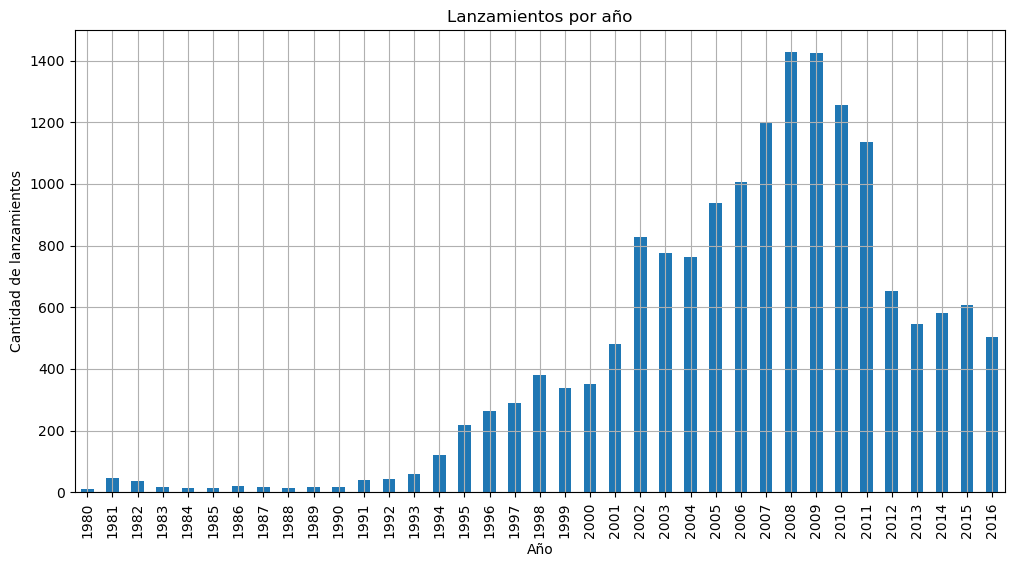

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
Name: count, dtype: int64


In [17]:
# Juegos lamzados en los diferentes años

release_year_games = games[games['year_of_release']>0]
year_counts = release_year_games['year_of_release'].value_counts().sort_index()
year_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Lanzamientos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de lanzamientos')
plt.grid(True)
plt.show()
print(year_counts.sort_values(ascending=False).head(5))

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Al ver los juegos por su año de lanzamiento, se observa que hasta antes de 2001, habían números bajos de lanzamientos y es a partir del 2001 que se tenían arriba de 400 juegos lanzados. El top de los cinco años con mayores lanzamientos son : 2008,2009,2010,2007,2011.
</div>

## Juegos según la plataforma

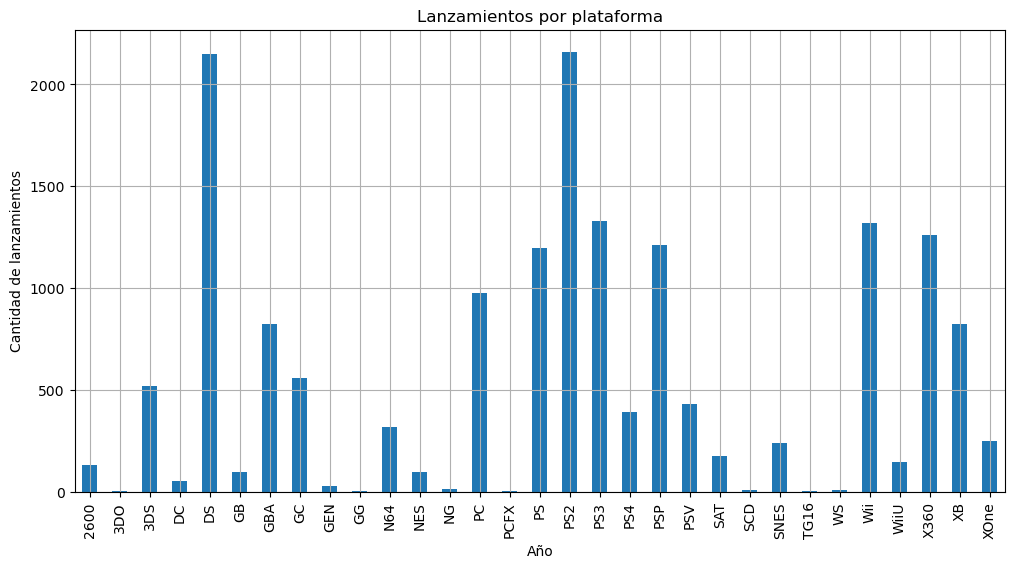

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: count, dtype: int64


In [18]:
# Juegos lanzados en las diferents plataformas.
platform_counts = games['platform'].value_counts().sort_index()
platform_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Lanzamientos por plataforma')
plt.xlabel('Año')
plt.ylabel('Cantidad de lanzamientos')
plt.grid(True)
plt.show()
print(platform_counts.sort_values(ascending=False).head(5))

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Al ver los juegos por la plataforma a la que pertenecen, se observa que PS2 y DS son los que lideran por mucho. Y les siguen PS3, Wii y X360 pero un poco abajos.

Será interesantes con este top 5 ver si sus lanzamientos ha sido consistenes en los años.
</div>

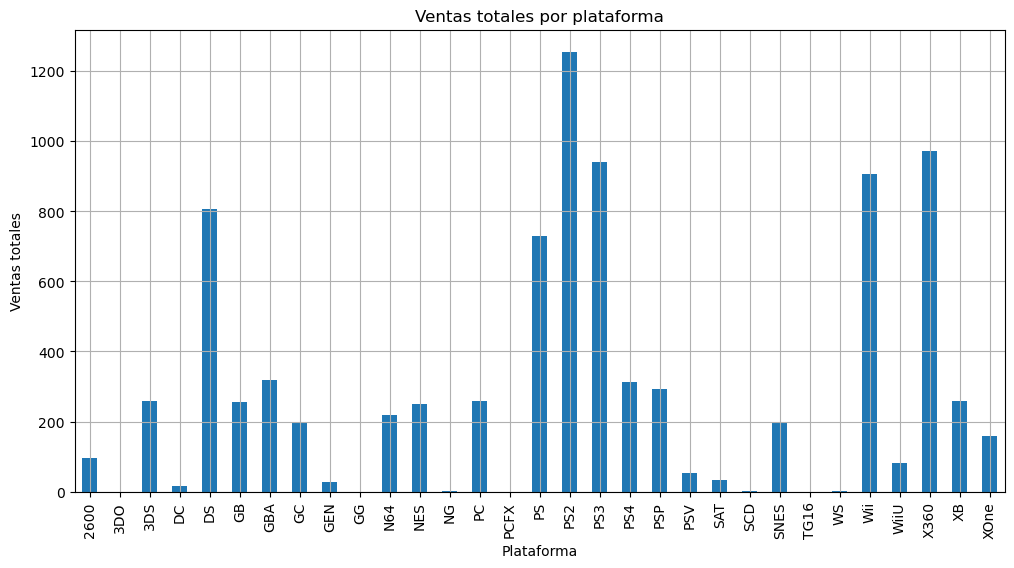

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64


In [19]:
# Ventas de los juegos en las diferents plataformas.
platform_revenue = games.groupby(by='platform')['total_sales'].sum()
platform_revenue.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.grid(True)
plt.show()
print(platform_revenue.sort_values(ascending=False).head(5))

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Comparando ahora por las ventas totales, se observa que el PS2 sigue a la cabeza , pero ahora X360 se posiciona en segundo lugar de ventas. 
    
El top 5 de lanzamientos concide con el top 5 de ventas, aunque no en el mismo orden, así que nos enfocaremos en estas cinco plataformas a lo largo de los años.
</div>

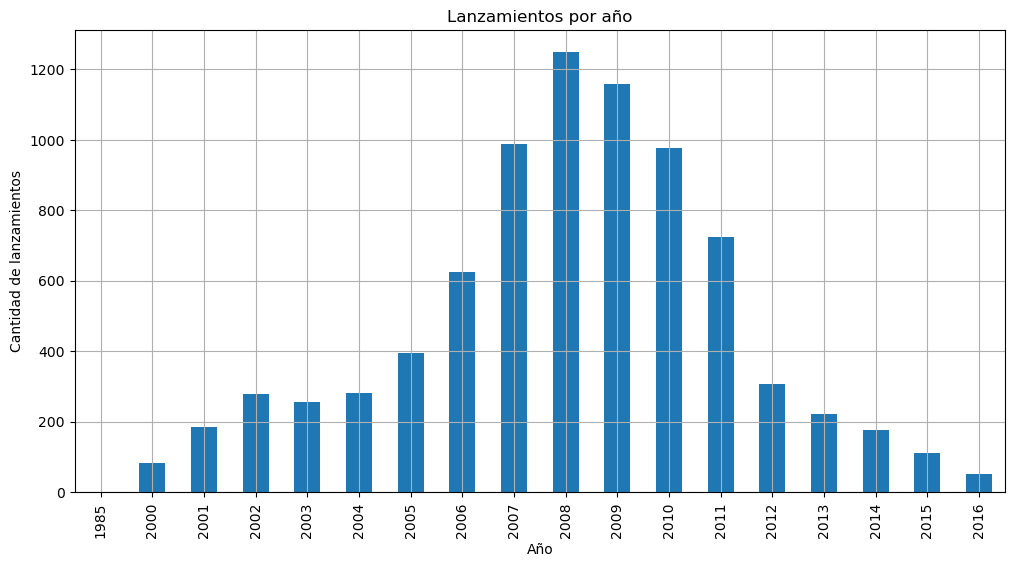

year_of_release
2008    1249
2009    1158
2007     988
2010     977
2011     724
Name: count, dtype: int64


In [20]:
# Vamos a fitlrar solo por el top 5 de paltaformas
top5 = ['PS2','X360','PS3','Wii','DS']
release_year_games_top5 = games.query('platform in @top5 and year_of_release>0')
year_counts_top5 = release_year_games_top5['year_of_release'].value_counts().sort_index()
year_counts_top5.plot(kind='bar', figsize=(12, 6))
plt.title('Lanzamientos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de lanzamientos')
plt.grid(True)
plt.show()
print(year_counts_top5.sort_values(ascending=False).head(5))

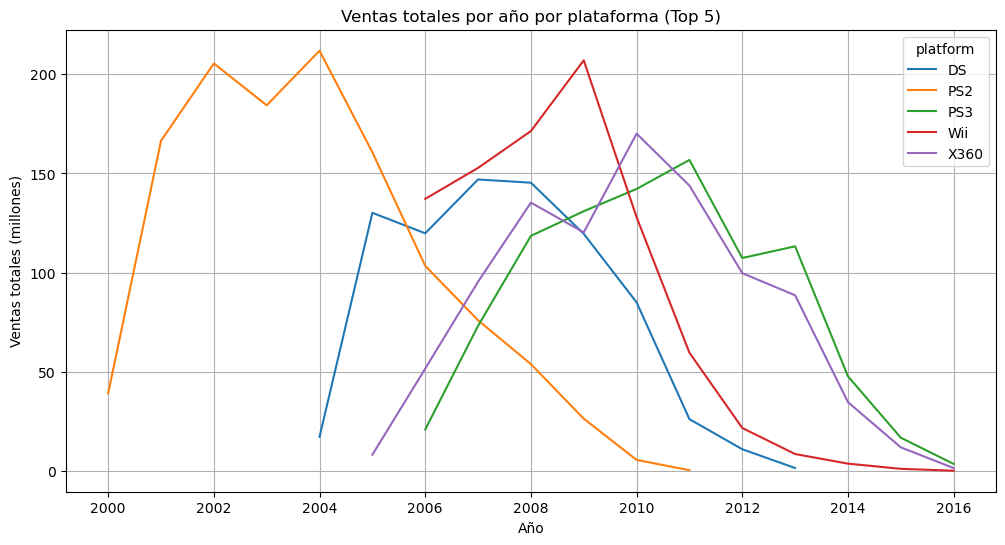

In [21]:
#sale_games_top5 = release_year_games_top5.groupby(by=['year_of_release','platform'])['total_sales'].sum().reset_index()
release_year_games_top5 = games.query('platform in @top5 and year_of_release>1985')
sale_games_top5 = release_year_games_top5.pivot_table( index='year_of_release',
                                                     columns='platform',
                                                     values = 'total_sales',
                                                     aggfunc='sum')
sale_games_top5.plot(kind='line', figsize=(12, 6))
plt.title('Ventas totales por año por plataforma (Top 5)')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.show()


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Algo muy marcado en este top5 de plataformas, es que en cuanto lanza un nuevo producto, al poco tiempo sus ventas suben, y se observa que al cuarto año de su lanzamiento las ventas comienzan a descender hasta entre el octavo y el décimo año.
</div>

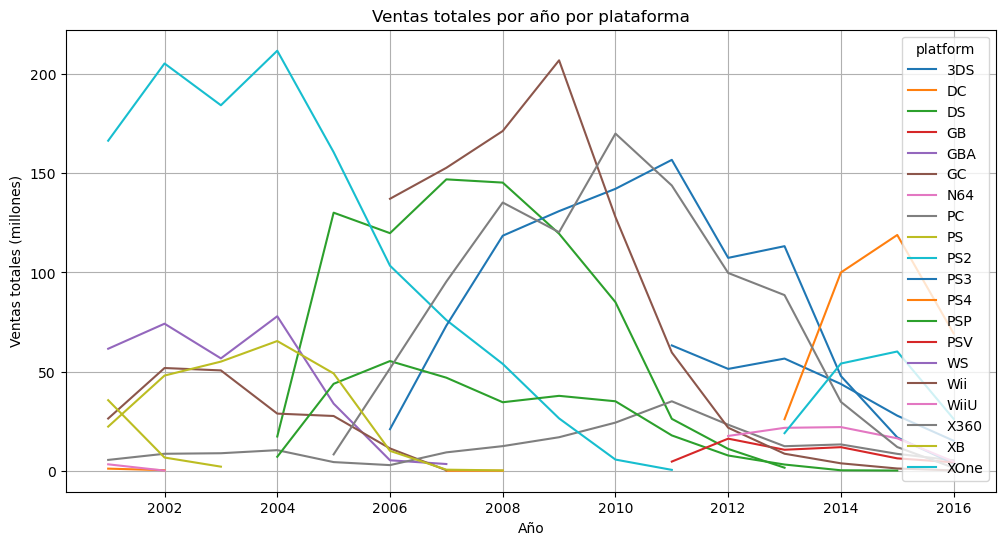

In [22]:
sale_games_complete = games[games['year_of_release'] > 2000].pivot_table( index='year_of_release',
                                                     columns='platform',
                                                     values = 'total_sales',
                                                     aggfunc='sum')
sale_games_complete.plot(kind='line', figsize=(12, 6))
plt.title('Ventas totales por año por plataforma')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.show()

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Considerando el análisis previo, y comparado ahora con el total de las plataformas se pued observar que:
    1. El top5 ya desparaceció o por desaparer a finales del 2016, así que no van a ser claves para el 2017.
    2. Considerando que el tiempo de vida (según los datos) de una plataforma es de 8 a 10 años, para dar una inferencia en 2017 basta con que tomemos los datos a apartir del 2008 para así tener una inferencia del 2017.
</div>

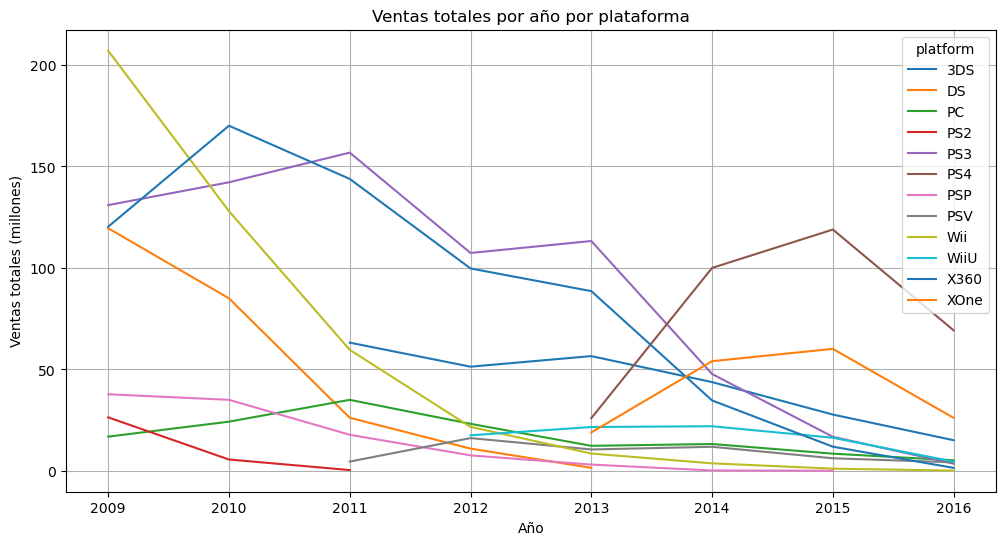

In [23]:
sale_games_interest = games[games['year_of_release'] > 2008].pivot_table( index='year_of_release',
                                                     columns='platform',
                                                     values = 'total_sales',
                                                     aggfunc='sum')
sale_games_interest.plot(kind='line', figsize=(12, 6))
plt.title('Ventas totales por año por plataforma')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.show()

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Se ve claramente que la gran mayoria de las plataforma ya van en decadencia y pueden tener presencia un par de años más. Sin embargo, el PS4 y el XOne aun están en auge y son los potenciales a tener presencia todo el año 2017.

    

Vamos a escojer a cinco plataformas que se ven potencialmente rentables para el 2017: Para eso vamos a tomar los años que llevan en el mercado y que aun están vigentes en 2016, y de eso, ordenados de menos a mayor sus años de presencia, tendremos los que aun son potencialmente rentables.
</div>

In [24]:
# Consideramos solo los que se han lazado depsués del 2018 y obtuenemos su priemra aparción y máxima aparición por plataforma
sale_games_interest_min_max = games[games['year_of_release'] > 2008].groupby('platform')['year_of_release'].agg(['min','max'])
#Calculamos la diferencia en años de presencia
sale_games_interest_min_max['diff'] = sale_games_interest_min_max['max'] - sale_games_interest_min_max['min']
#Consideramos aquellos que aun son vigentes en 2016 que son los datos que tenemos
sale_games_interest_min_max =sale_games_interest_min_max[sale_games_interest_min_max['max']==2016]
# Imprimimos ordenados de menor a mayor diferencia
print(sale_games_interest_min_max.sort_values(by='diff'))

           min   max  diff
platform                  
PS4       2013  2016     3
XOne      2013  2016     3
WiiU      2012  2016     4
3DS       2011  2016     5
PSV       2011  2016     5
PC        2009  2016     7
PS3       2009  2016     7
Wii       2009  2016     7
X360      2009  2016     7


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Del análisis anterior, ya tenemos a nuestras plataformas potencialmentes rentables para el  2017:
PS4, XOne, WiiU, 3DS, PSV

</div>

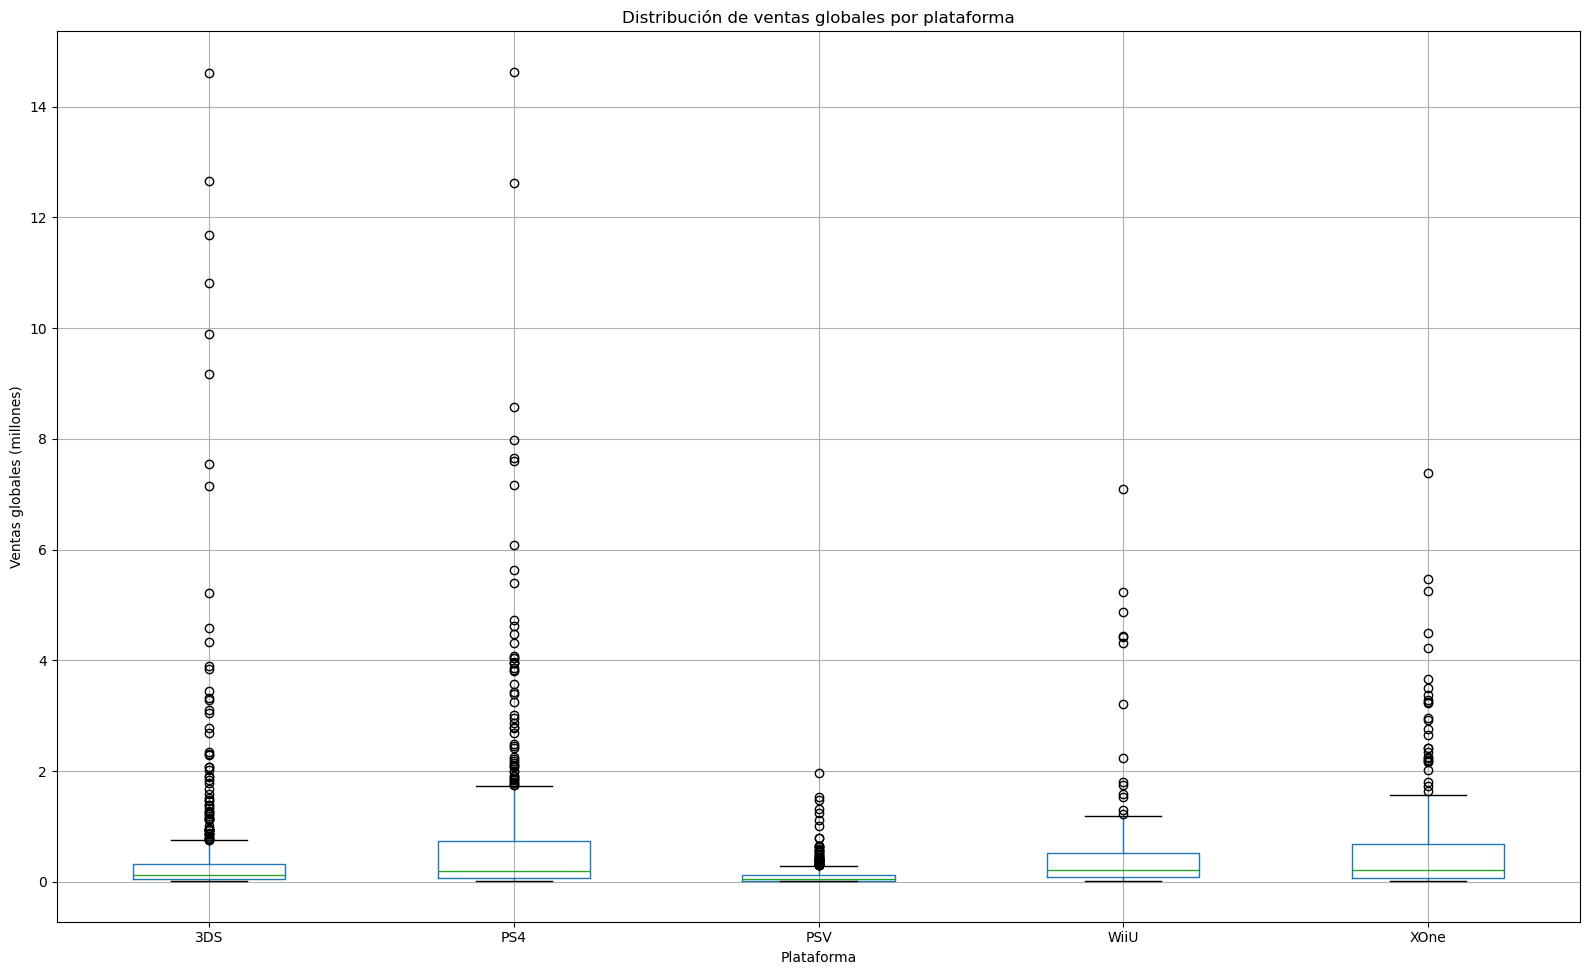

In [25]:
potencial_platforms = ['PS4','XOne','WiiU','3DS','PSV']
potencial_games = games.query('platform in @potencial_platforms')

potencial_games.boxplot(column='total_sales',by='platform', figsize=(16,10))
plt.suptitle('')
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Del diagram anterior podemos concluir que:

1. La gran mayoría de las plataforma, tiene su promedio de juegos en ventas muy bajas, menos de 1 millón.
2. PS4 y XOne, tiene la caja un poco más ancha, loque significa que tiene más juegos estrella que las demás plataformas.
3. PSV es el que consistentemente tiene pocos juegos excepcionales y bajas ventas.
4. 3DS y PS4 tiene un par de juegos arriba de los 10 millones!! lo que significa que esto outliers son importantes y representan grandes éxitos comericales.
5. el WiiU y XOne, un poco menos, cerca de los 8 millones, pero también tiene juego exitosos.
</div>

## Correlación de los juegos en sus ventas y la crítica

La correlación entre las ventas y la crítica es:  0.3490095802924567


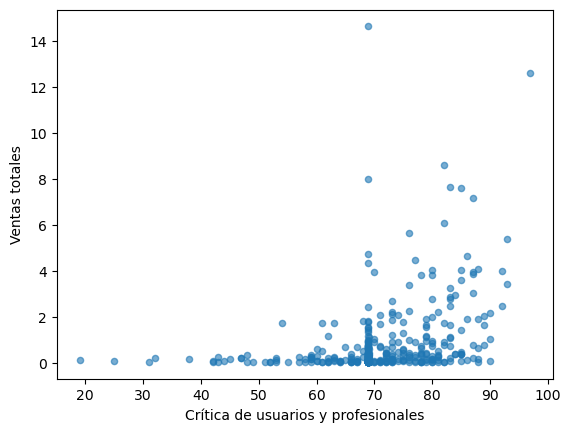

In [26]:
# Buscaremos una correlación entre las ventas y las reseñas de los usuarios
#print(potencial_games.head())
games_ps4 = potencial_games[potencial_games['platform']=='PS4']
corr_sales_critic  = games_ps4['critic_score'].corr(games_ps4['total_sales'])
print("La correlación entre las ventas y la crítica es: ",corr_sales_critic)

games_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.6
                    ,xlabel ='Crítica de usuarios y profesionales', ylabel='Ventas totales')
plt.show()


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Tomemos solo los juegos de la plataforma PS4:

Se observa que hay una correlación positiva(0.34) entre la críticas de los usuarios y profesionales y las ventas de los juegos.
    
En un alto porcentaje las crítica no se ve que impacta, pero a ciertos juegos se ve que les benefició muy positivamente.
</div>

# Top 10 de ventas de los juegos por plataforma

['Call of Duty: Black Ops 3' 'Grand Theft Auto V' 'FIFA 16'
 'Star Wars Battlefront (2015)' 'Call of Duty: Advanced Warfare' 'FIFA 17'
 'Fallout 4' 'FIFA 15' 'Destiny' "Uncharted 4: A Thief's End"]


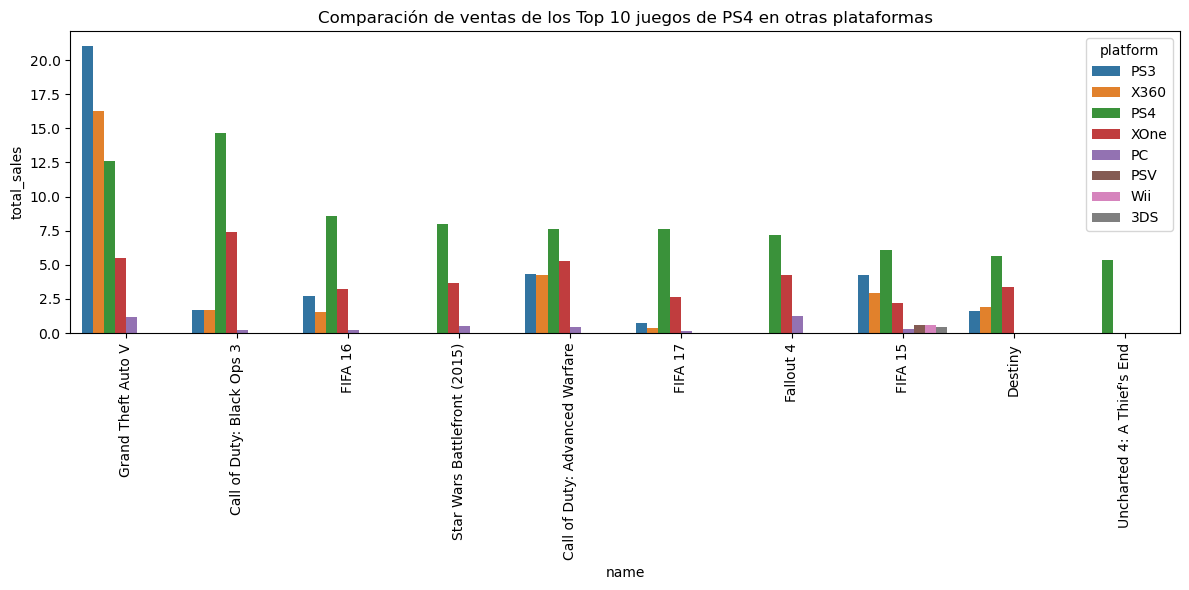

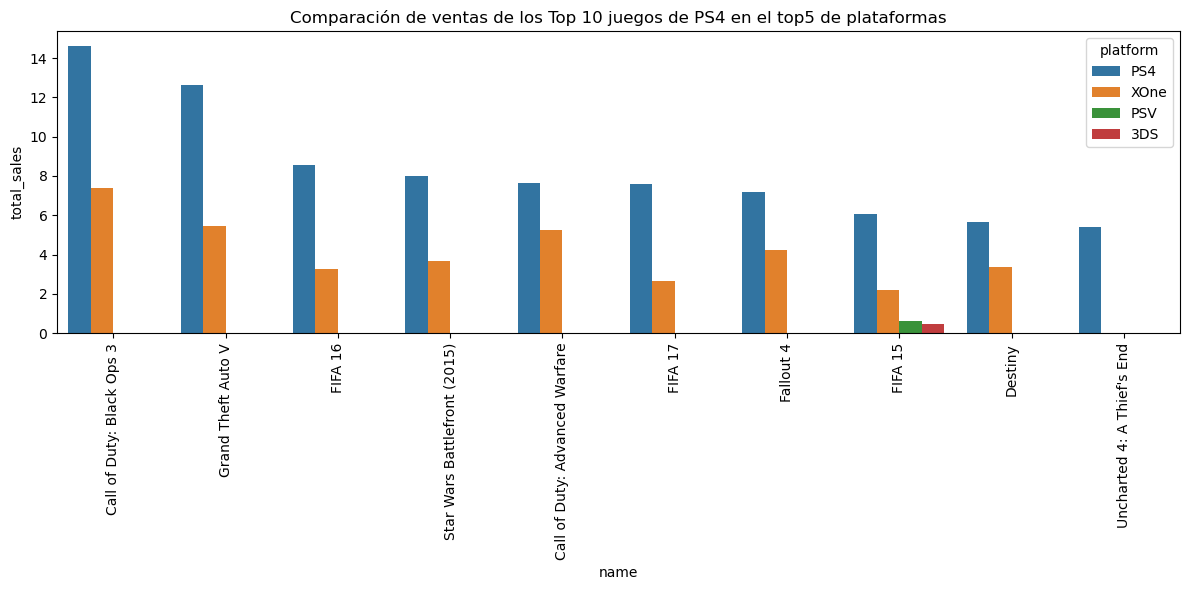

In [27]:
#Desde la paltaforma PS4, vamos a buscar el top10 de ventas
games_ps4_top10 = games_ps4.groupby(by='name')['total_sales'].sum().sort_values(ascending=False).reset_index()

#Creamos el arreglo con los 10 juego más rentables del PS4
games_ps4_top10 = games_ps4_top10.head(10)['name'].unique()
print(games_ps4_top10)

#Ahora buscmos estos juegos en todas las demás plataformas
games_top10_multiplatform = games[games['name'].isin(games_ps4_top10)]
#print(games_top10_multiplataform)


plt.figure(figsize=(12,6))
sns.barplot(data=games_top10_multiplatform, x='name', y='total_sales', hue='platform')
plt.title('Comparación de ventas de los Top 10 juegos de PS4 en otras plataformas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



#Ahora buscmos estos juegos SOLO  en las plataformas de interés
games_top10_multiplatform = games_top10_multiplatform[games_top10_multiplatform['platform'].isin(potencial_platforms)]



plt.figure(figsize=(12,6))
sns.barplot(data=games_top10_multiplatform, x='name', y='total_sales', hue='platform')
plt.title('Comparación de ventas de los Top 10 juegos de PS4 en el top5 de plataformas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Considerando los juegos más rentables del PS4, y tomando el top10:

    ['Call of Duty: Black Ops 3' 'Grand Theft Auto V' 'FIFA 16'
     'Star Wars Battlefront (2015)' 'Call of Duty: Advanced Warfare' 'FIFA 17'
     'Fallout 4' 'FIFA 15' 'Destiny' "Uncharted 4: A Thief's End"]

Observamos las ventas de estos mismo juegos en las diferentes pataformas y podemos concluir 

1. Tanto en lo general como en lo particular (top 5 plataformas), las ventas en la plataforma PS4 son muy consistentes y se mantiene aun con gran auge.
2. Reforanzan nuestro anális de proyección para 2017, las plataformas PS4 y XOne aún lideran las ventas y tiene mucho potencial paras las ventas en el 2017.
</div>

## Juegos según su género

count       1736
unique        12
top       Action
freq         630
Name: genre, dtype: object


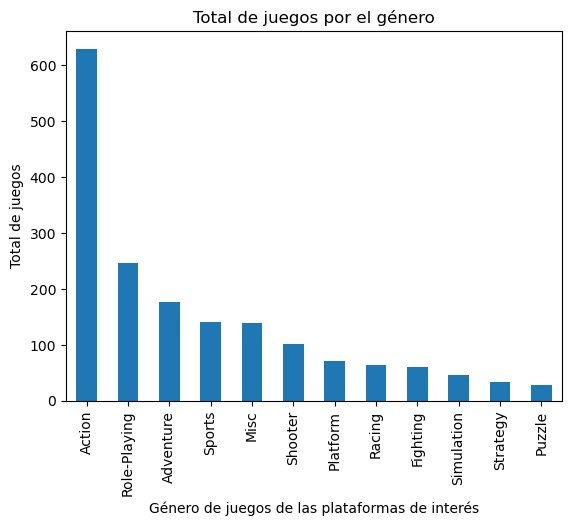

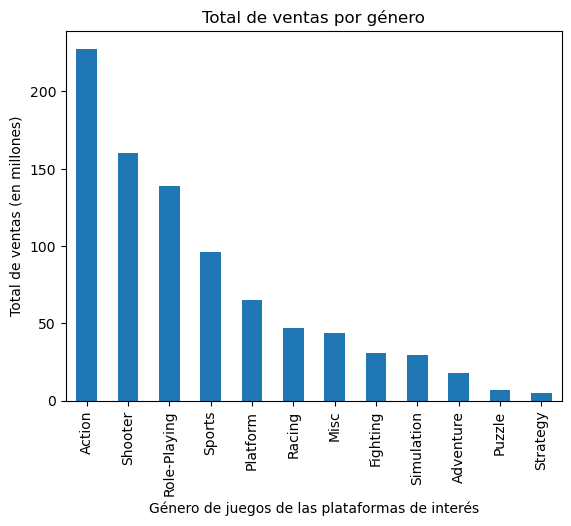

              total_x_ventas  total_frecuencia  rate_revenue_x_frec
genre                                                              
Shooter               160.07               101             1.584851
Platform               65.24                71             0.918873
Racing                 47.27                64             0.738594
Sports                 95.87               141             0.679929
Simulation             29.65                46             0.644565
Role-Playing          139.07               246             0.565325
Fighting               30.55                60             0.509167
Action                227.74               630             0.361492
Misc                   43.50               139             0.312950
Puzzle                  7.09                28             0.253214
Strategy                4.72                34             0.138824
Adventure              17.95               176             0.101989


In [28]:
print(potencial_games['genre'].describe())

#Analizamos la canidad de juegos por su frecuencia con respecto a género del juego
potencial_games_genre = potencial_games.groupby(by='genre')['genre'].count().sort_values(ascending=False)
#print(potencial_games_genre)
potencial_games_genre.plot(kind='bar')
plt.title('Total de juegos por el género')
plt.xlabel('Género de juegos de las plataformas de interés')
plt.ylabel('Total de juegos')
plt.show()

#Ahora veamos las ventas de estos juegos según el género
potencial_games_genre_revenue = potencial_games.groupby(by='genre')['total_sales'].sum().sort_values(ascending=False)
potencial_games_genre_revenue.plot(kind='bar')
plt.title('Total de ventas por género')
plt.xlabel('Género de juegos de las plataformas de interés')
plt.ylabel('Total de ventas (en millones)')
plt.show()

genre_revenue_compare= pd.concat([potencial_games_genre_revenue,potencial_games_genre], axis='columns')
genre_revenue_compare.columns = ['total_x_ventas','total_frecuencia']
genre_revenue_compare.reset_index()

genre_revenue_compare['rate_revenue_x_frec'] = genre_revenue_compare['total_x_ventas']/genre_revenue_compare['total_frecuencia']
print(genre_revenue_compare.sort_values(by='rate_revenue_x_frec',ascending=False))


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Ahora, si nos enfocamos en el género de los juegos se ve claramente que los juegos de Acción son los que más existen en el mercado, seguido del género Role-Playing.

Pero analizando los juegos más rentables, aun tenemos a los juegos de Acción, pero sorprendentemente, el género de Shooting, pese a ser el séptimo lugar en cantidad, es el segundo lugar en rentabilidad. Y los luegos de Role-Playing baja a tercer lugar.

Así que el género de acción es muy rentable pero también es porque existe una inmensidad de juegos en el mercado, es por eso que revisamos el ratio entre:
    
    [Ratio de ventas por juego] =   [Total de ventas] / [Frecuencia]

Observamos que el género Shooter es el más rentable del mercado

                       total_x_ventas  total_frecuencia  rate_revenue_x_frec
        genre                                                              
        Shooter               160.07               101             1.584851
        Platform               65.24                71             0.918873
        Racing                 47.27                64             0.738594
        Sports                 95.87               141             0.679929
        Simulation             29.65                46             0.644565
        Role-Playing          139.07               246             0.565325
        Fighting               30.55                60             0.509167
        Action                227.74               630             0.361492
        Misc                   43.50               139             0.312950
        Puzzle                  7.09                28             0.253214
        Strategy                4.72                34             0.138824
        Adventure              17.95               176             0.101989

Los géneros de Puzzle y Strategy, son consistentemen lo de menor rentabilida, pero también lo de menor presencia en le mercado.

El género de acción ya no pinto como un top al ver su ratio por juego. Lo que refuerza que la conclusión que tiene muchas ganacias gracias al volumen de juegos en el mercado.


Así que el género cadidato para grandes ganancias en el 2017 es Shooter, y como son pocos, eso lo va hacer más rentable.
</div>

## Perfil de los usuarios por región: Norteamérica, Europa y Japón

In [29]:
#print(games.head(10))
# Nos vamos a fijar únicamente en los dato de los juego que salieron al mercado a partir del  2008
games_above_2008 =  games[games['year_of_release'] > 2008]

['X360' 'PS3' 'Wii' 'DS' 'PS4']


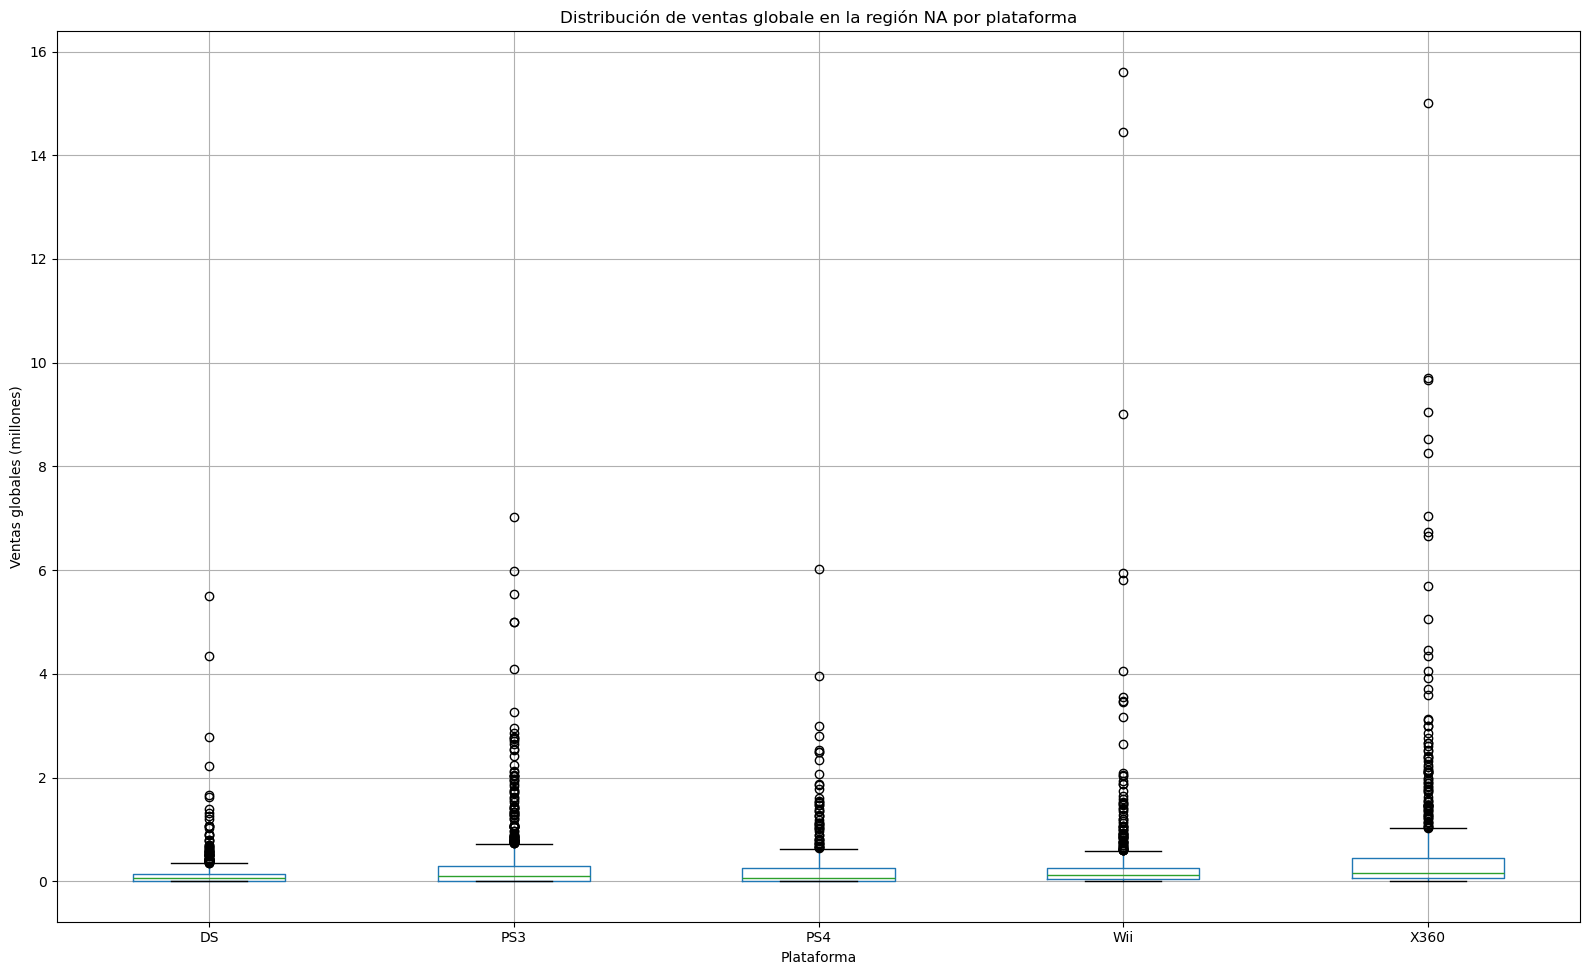

In [30]:

games_na = games_above_2008.groupby(by='platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
games_na_top5 = games_na.head(5)['platform'].unique()

# Top 5 de mejores ventas por plataforma en la región NA
print(games_na_top5)


games_above_2008[games_above_2008['platform'].isin(games_na_top5)].boxplot(column='na_sales',by='platform', figsize=(16,10))
plt.suptitle('')
plt.title('Distribución de ventas globale en la región NA por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()



<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
En la región de Norteamérica se observa que existe un mayor volumne de ventas de la plataforma X360, tiene una caja más ancha lo que significa que tiene mayor cantidad de juegos aunque esa mayoría no represeta el mayor volumen de ganacias.
Se observa que esa misma plataforma tiene un Juego estrella, superada un poco solo por Wii, que tiene dos juegos estrella.
</div>

['PS3' 'X360' 'PS4' 'Wii' 'PC']


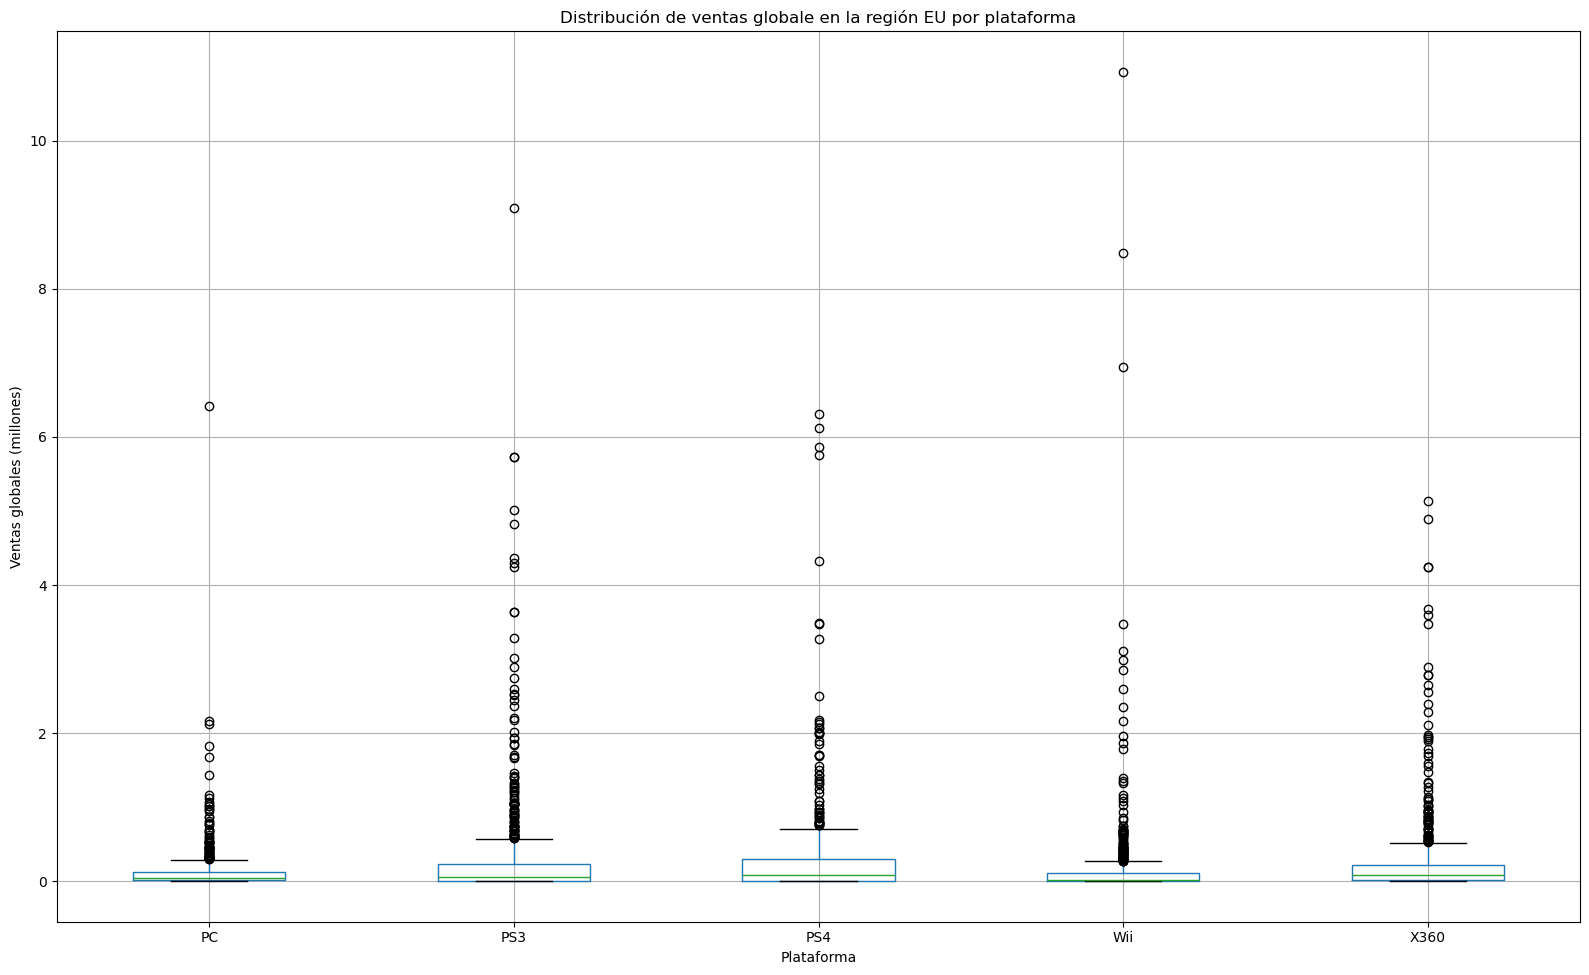

In [31]:

games_eu = games_above_2008.groupby(by='platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
games_eu_top5 = games_eu.head(5)['platform'].unique()

# Top 5 de mejores ventas por plataforma en la región EU
print(games_eu_top5)

games_above_2008[games_above_2008['platform'].isin(games_eu_top5)].boxplot(column='eu_sales',by='platform', figsize=(16,10))
plt.suptitle('')
plt.title('Distribución de ventas globale en la región EU por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
En la región de Europa se observa que existe un mayor volumne de ventas de la plataforma PS4, tiene una caja ligeramente más ancha que el PS3, lo que significa que el PS4 tiene mayor cantidad de juegos aunque esa mayoría no represeta el mayor volumen de ganacias.
En constrate, es la plataforma Wii que tiene el juego estrella con mayores ganancias en toda Europa, superando a penas los 10 millones de ventas, esto es muy por debajo a las ventas máximas en Norteamérica que está cerca de los 16 millones.
</div>

['3DS' 'PS3' 'DS' 'PSP' 'Wii']


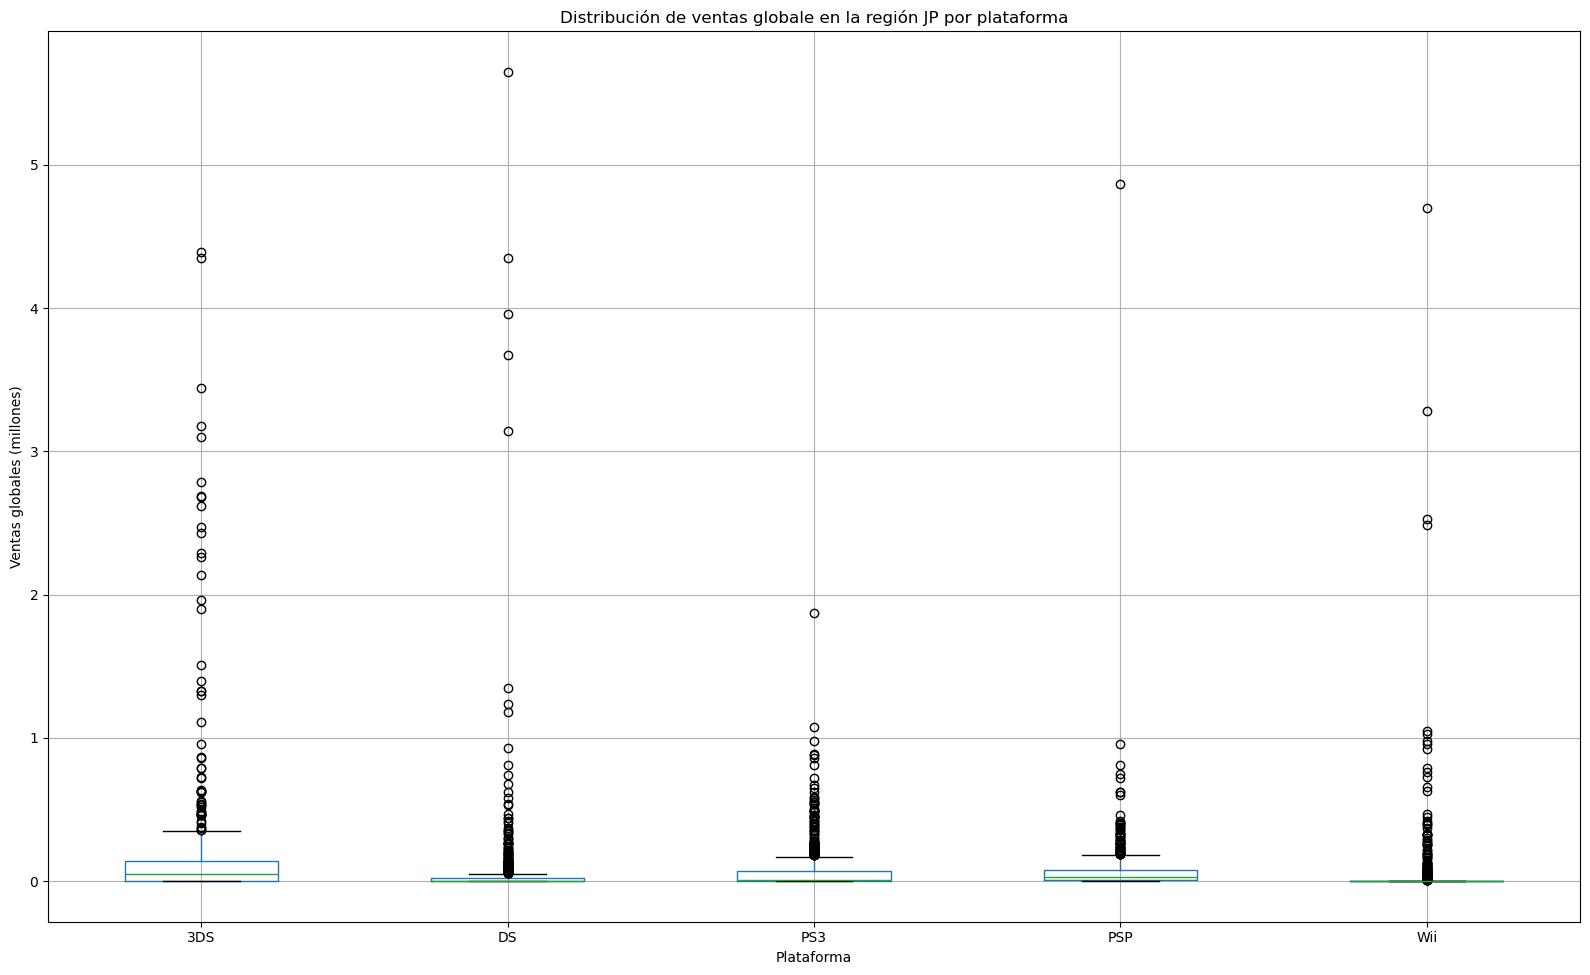

In [32]:

games_jp = games_above_2008.groupby(by='platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
games_jp_top5 = games_jp.head(5)['platform'].unique()

# Top 5 de mejores ventas por plataforma en la región NA
print(games_jp_top5)

games_above_2008[games_above_2008['platform'].isin(games_jp_top5)].boxplot(column='jp_sales',by='platform', figsize=(16,10))
plt.suptitle('')
plt.title('Distribución de ventas globale en la región JP por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
En la región de Japón se observa que existe un mayor volumne de ventas de la plataforma 3DS, tiene una caja mayor, lo que significa que el 3DS tiene mayor cantidad de juegos aunque esa mayoría no represeta el mayor volumen de ganacias.
En constrate, es la plataforma DS que tiene el juego estrella con mayores ganancias en todo Japón, con una ganacia de poco menos de 6 millones, esto es muy por debajo a las ventas máximas en Norteamérica y Europa.
</div>

## Anális de ventas en las diferentes regiones por el género del juego

['Action' 'Shooter' 'Sports' 'Misc' 'Role-Playing']


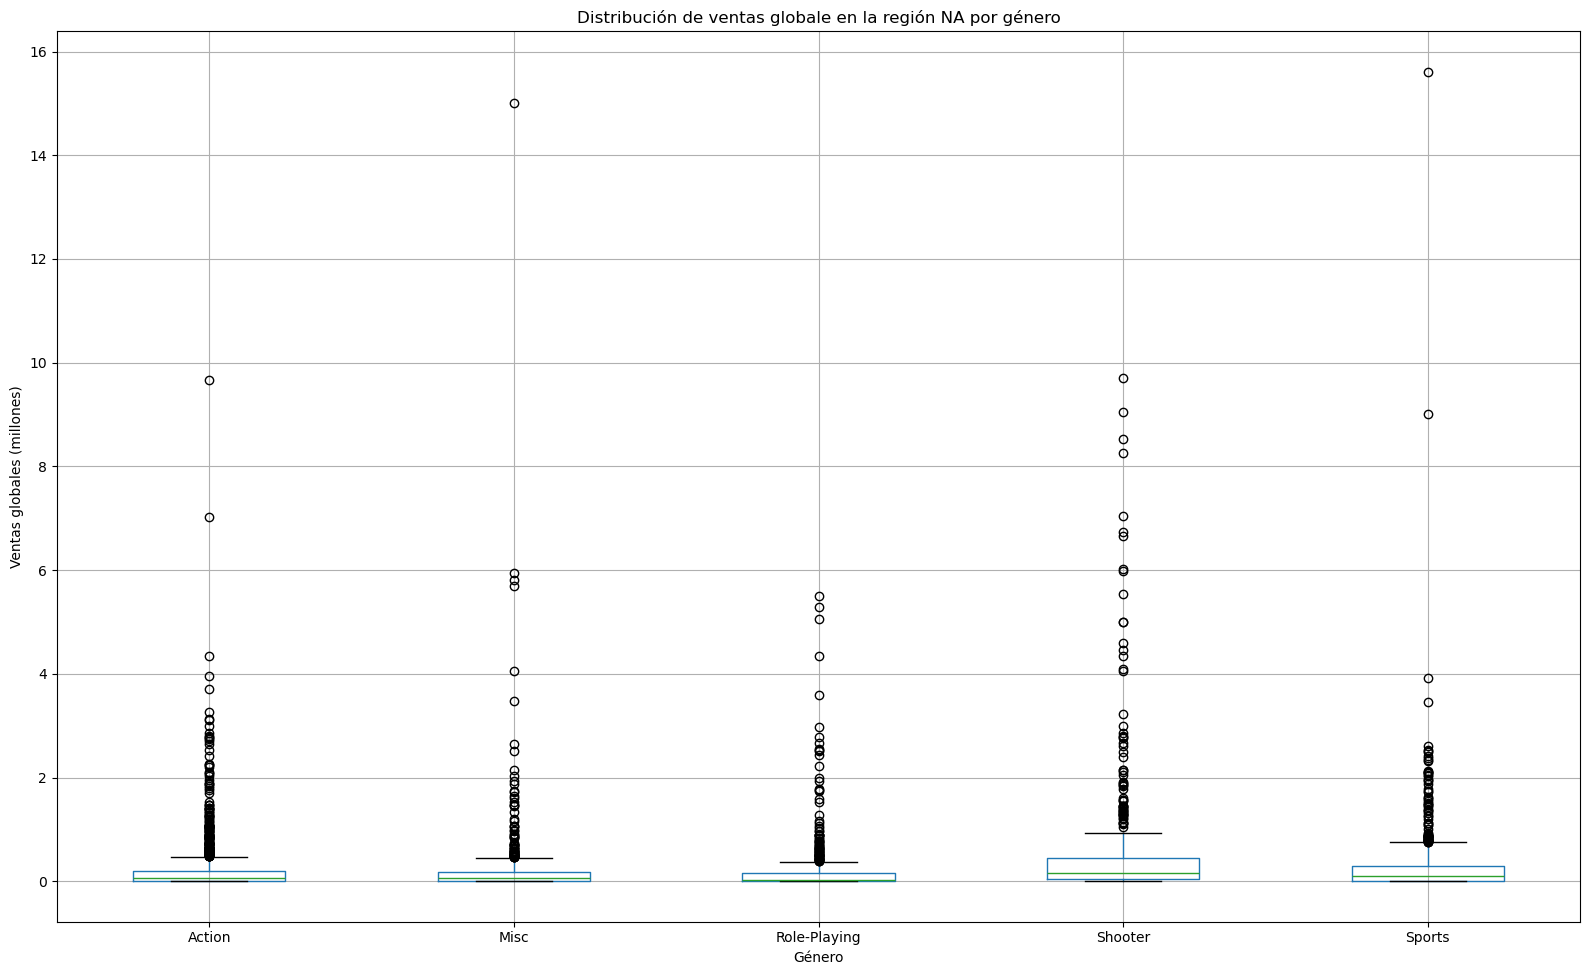

In [33]:
games_na_genere = games_above_2008.groupby(by='genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
games_na_genere_top5 = games_na_genere.head(5)['genre'].unique()

# Top 5 de mejores ventas por plataforma en la región NA
print(games_na_genere_top5)


games_above_2008[games_above_2008['genre'].isin(games_na_genere_top5)].boxplot(column='na_sales',by='genre', figsize=(16,10))
plt.suptitle('')
plt.title('Distribución de ventas globale en la región NA por género')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
En la región de Norteamérica, se observa que el género Shooter es el que tiene mayor volumen de ventas aunque sus ventas son meno a los 10 millones.
En contraste, Sports y Misc son los que tienen juegos estrella que llegan caso a los 16 millones en ventas.
</div>

['Action' 'Shooter' 'Sports' 'Misc' 'Role-Playing']


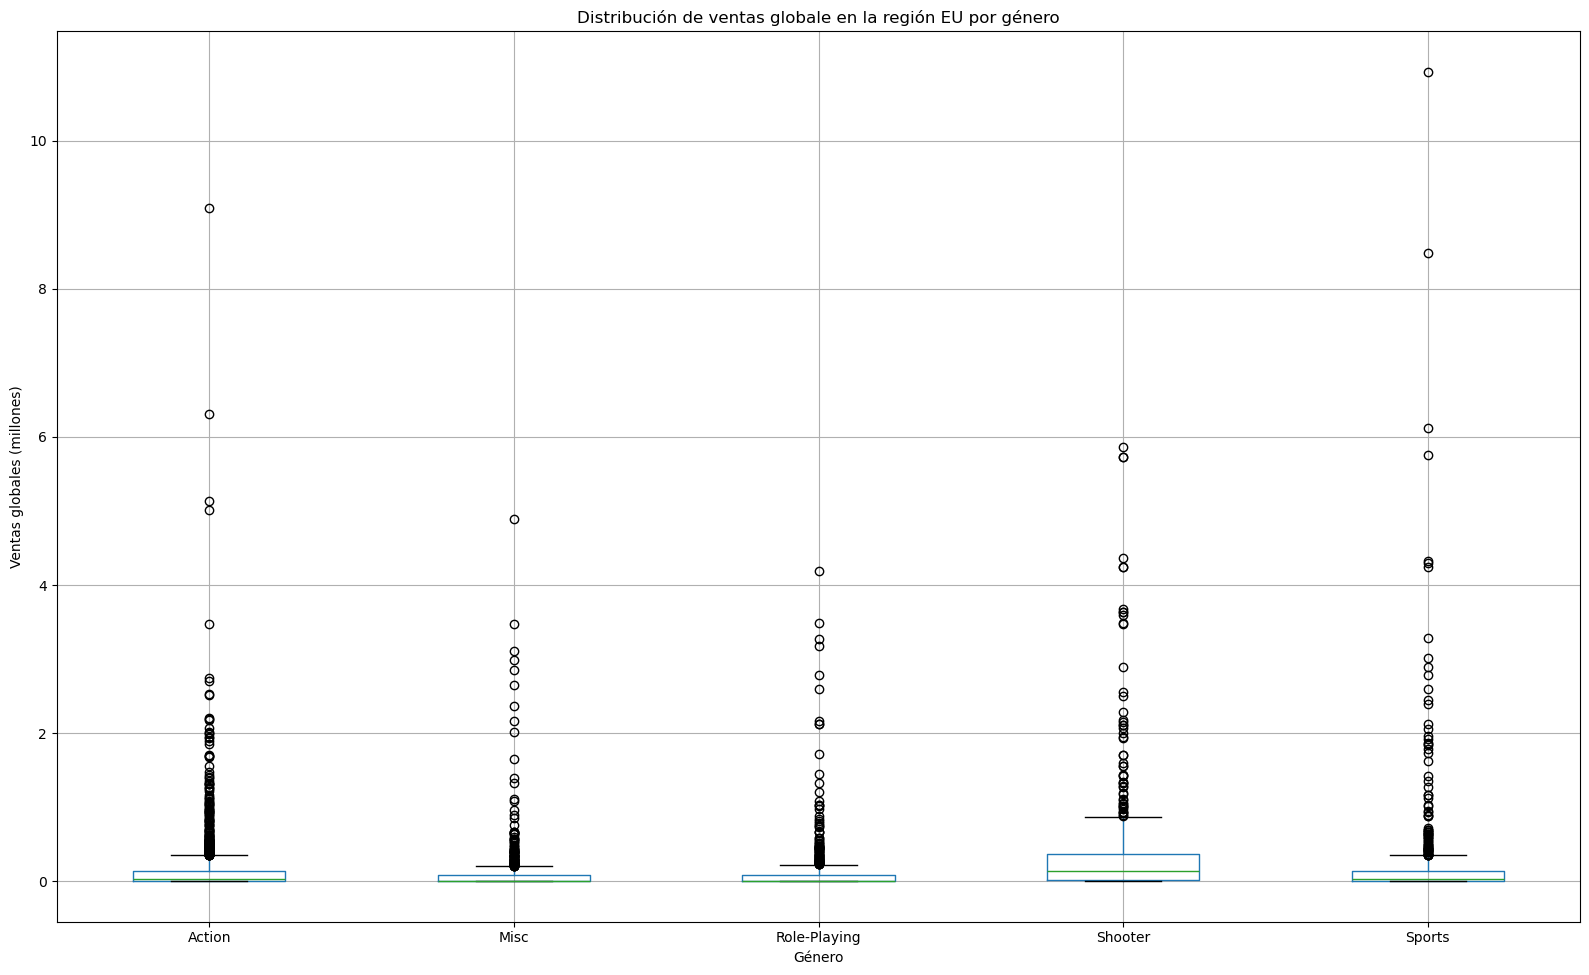

In [34]:
games_eu_genere = games_above_2008.groupby(by='genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
games_eu_genere_top5 = games_eu_genere.head(5)['genre'].unique()

# Top 5 de mejores ventas por plataforma en la región NA
print(games_eu_genere_top5)


games_above_2008[games_above_2008['genre'].isin(games_eu_genere_top5)].boxplot(column='eu_sales',by='genre', figsize=(16,10))
plt.suptitle('')
plt.title('Distribución de ventas globale en la región EU por género')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
En la región de Europa se oberva nuevamente que Shooter es el género con mayor volumen en ventas, sin embgargo es Sport y Action los que tiene un juego estrella cada uno arriba de los 8 millones.
</div>

['Role-Playing' 'Action' 'Misc' 'Sports' 'Platform']


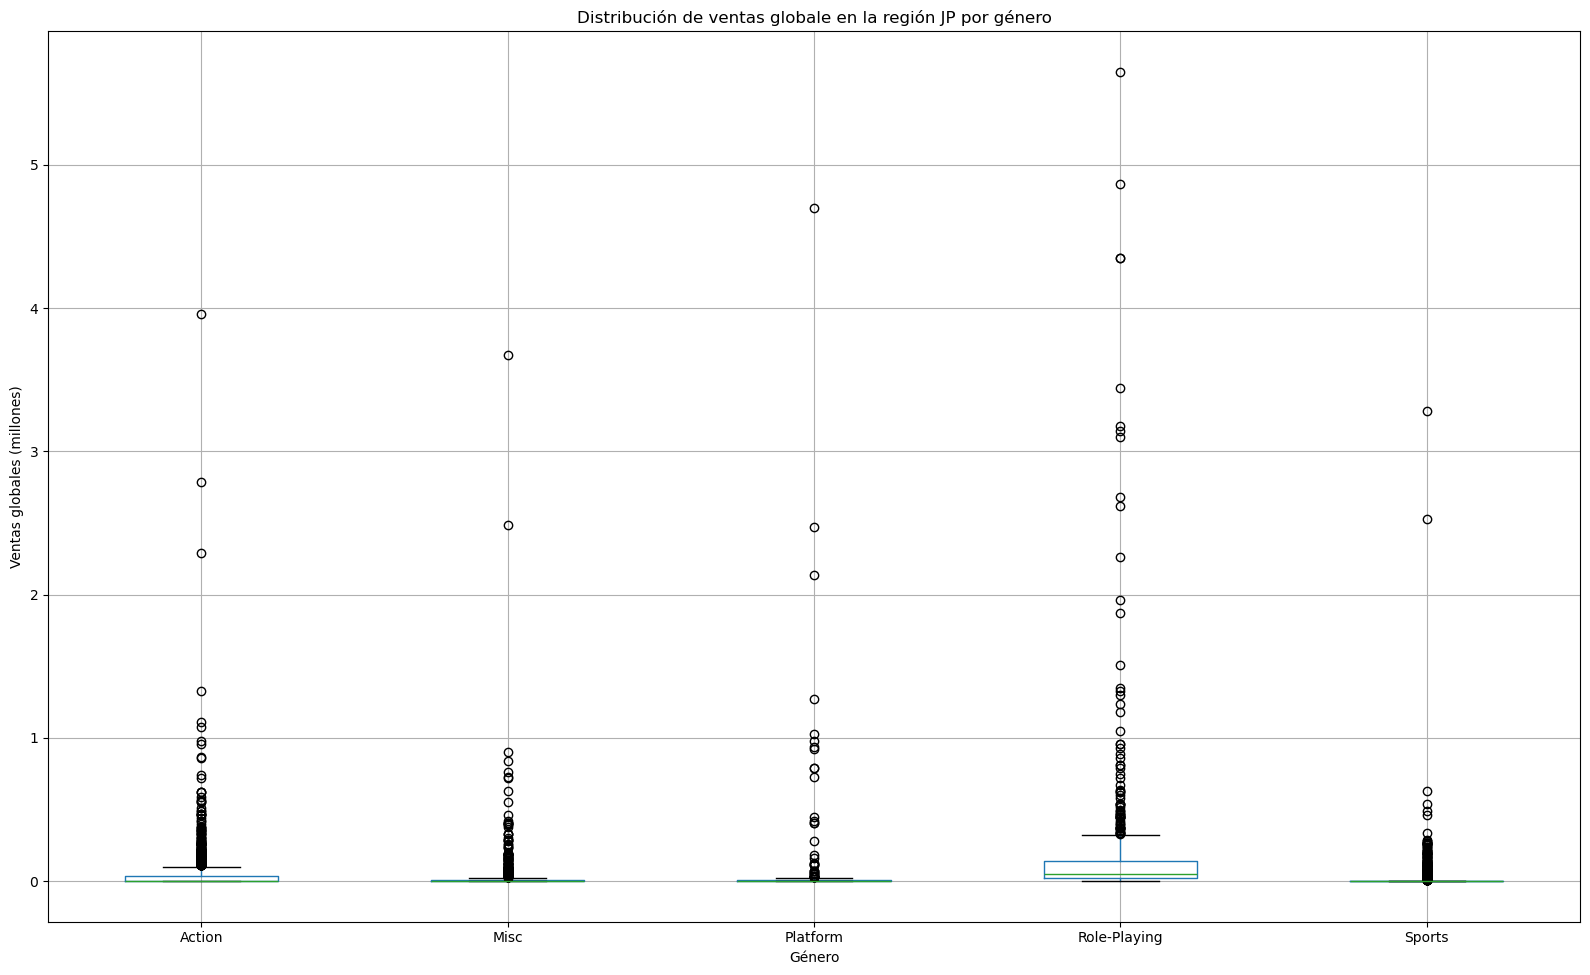

In [35]:
games_jp_genere = games_above_2008.groupby(by='genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
games_jp_genere_top5 = games_jp_genere.head(5)['genre'].unique()

# Top 5 de mejores ventas por plataforma en la región NA
print(games_jp_genere_top5)


games_above_2008[games_above_2008['genre'].isin(games_jp_genere_top5)].boxplot(column='jp_sales',by='genre', figsize=(16,10))
plt.suptitle('')
plt.title('Distribución de ventas globale en la región JP por género')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
En la región de Japón, Role-Playing es quien tiene mayor volumen de ventas y con tres juegos estrella arriba de los 4 millones.
Se puede obsrrvar también que en Japón, abundan más lo juegos estrella que volumen por género, así que ahí son muy particulares los juegos que destacan.
</div>

## Total de ventas y su clasificación ESRB por región

        na_sales  eu_sales  jp_sales
rating                              
AO          0.00      0.00      0.00
E         403.16    261.50     61.49
E10+      202.94    121.63     20.82
EC          1.32      0.00      0.00
K-A         0.00      0.00      0.00
M         440.86    326.50     35.63
RP          0.00      0.03      0.00
T         227.11    153.28     50.59
TBD         0.00      0.00      0.00


C:\Users\paste\AppData\Local\Temp\ipykernel_2944\1131236486.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_esrb = games_above_2008[games_above_2008['rating'] != 'TBD'].groupby(by='rating').agg(agg_sales)


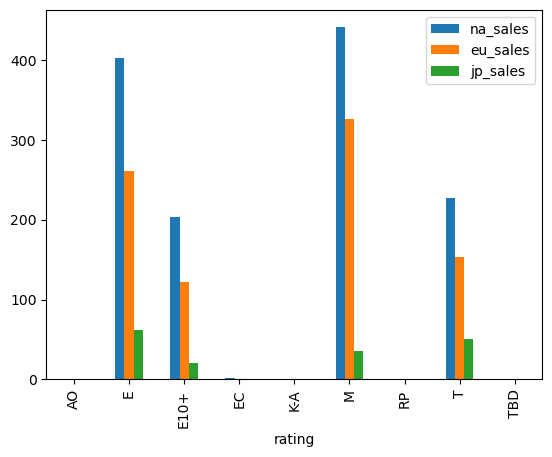

In [36]:
agg_sales = {'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}

sales_esrb = games_above_2008[games_above_2008['rating'] != 'TBD'].groupby(by='rating').agg(agg_sales)
print(sales_esrb)

sales_esrb.plot(kind='bar')
plt.show()

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
    
    E- Everyone
    E10+ - Everyone above 10 years
    T - Teens
    M - Mature +17
    
Ya hemos visto que en genral, en la región de japón la ventas son menores en casi todos los aspectos. Y ahora desde las óptica de la clasificación ESRB, se observa que las ventas son casi las mismas en las cuatro clasificaciónes más presentes.

En la región de Europa, sí tenemos una mayor preferencia de los usuarios por juegos Matures+17 seguido de Everyone.

En la región de Norteamérica tenemos un comportamiento similar a la de Europa.

No podemos concluir que la clasificación ESRB afecta las ventas, pero sí podemos decir que las regiones tienes ciertas preferencias
</div>


## Hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [37]:
games_XOne_user_score = games_above_2008[games_above_2008['platform'] == 'XOne']['user_score']
var_XOne_user_score = np.var(games_XOne_user_score)
mean_XOne_user_score = games_XOne_user_score.mean()


games_PC_user_score = games_above_2008[games_above_2008['platform'] == 'PC']['user_score']
var_PC_user_score = np.var(games_PC_user_score)
mean_PC_user_score = games_PC_user_score.mean()

print("La varianza de la calificación de los usuarios del XOne es:", var_XOne_user_score)
print("La media de la calificación de los usuarios del XOne  es:", mean_XOne_user_score)
print("La varianza de la calificación de los usuarios en PC es:", var_PC_user_score)
print("La media de la calificación de los usuarios en PC  es:", mean_PC_user_score)


stat, p_value = levene(games_XOne_user_score, games_PC_user_score)

print('Valor p de Levene:', p_value)

if p_value < 0.05:
    print("Rechazamos la hipótesis de varianzas iguales")
else:
    print("No podemos rechazar la hipótesis de varianzas iguales")


alpha = 0.05# nivel crítico de significación estadística

results = st.ttest_ind(games_XOne_user_score,games_PC_user_score, equal_var= False)
#  prueba la hipótesis de que las medias de las dos poblaciones independientes son diferentes

print('valor p:', results.pvalue)

if  results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


La varianza de la calificación de los usuarios del XOne es: 1.5831195397400344
La media de la calificación de los usuarios del XOne  es: 6.778947368421053
La varianza de la calificación de los usuarios en PC es: 1.998960180083634
La media de la calificación de los usuarios en PC  es: 6.838737201365187
Valor p de Levene: 0.28507675387050835
No podemos rechazar la hipótesis de varianzas iguales
valor p: 0.5472006674981031
No podemos rechazar la hipótesis nula


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Para trabajar con este hipótesis, primero necesitamos preparar nuestros conjunto de datos con las calificaciones de los usuarioa tanto del XOne como de PC.

Al observar sus respectivas medias y varianzas, notamos que la media de calificaciones de usuarios es similar entre ambas plataformas, mientras que sus varianzas presentan una ligera diferencia:
    
    Varianza (XOne): 1.58
    Media (XOne): 6.78
    Varianza (PC): 1.99
    Media (PC): 6.83

Para comprombar si podemos asumir la igualdad de las varianzas, aplicamos la prueba de levene:
    
    Valor p de Levene: 0.28507675387050835
    No podemos rechazar la hipótesis de varianzas iguales

Ahora, con datos más sólidos vamos a usar la prueba estadística ttest_ind con varianzas diferente y un valor alfa de 5%.

    La hipósesis nula H0 será: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
    
    La hipósesis alternativa H1 será: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

valor p: 0.5472006674981031
No podemos rechazar la hipótesis nula por lo tanto:

    A un nivel de significancia del 5%, no hay evidencia suficiente para afirmar que las calificaciones promedo de las plataformas Xbox One y PC son diferentes.
    Por lo tanto, se mantiene la hipótesis que de que las calificaciones promedio son iguales entre ambas plataformas.

</div>


## Hipótesis: Las calificaciones promedio de los usuarios  para los géneros de Acción y Deportes son diferentes.

In [105]:

games_action_user_score = games_above_2008[games_above_2008['genre'] == 'Action']['user_score']
var_action_user_score = np.var(games_action_user_score)
mean_action_user_score = games_action_user_score.mean()


games_sports_user_score = games_above_2008[games_above_2008['genre'] == 'Sports']['user_score']
var_sports_user_score = np.var(games_sports_user_score)
mean_sports_user_score = games_sports_user_score.mean()

print("La varianza de la calificación de los usuarios del género Action es:", var_action_user_score)
print("La media de la calificación de los usuarios del género Action es:", mean_action_user_score)
print("La varianza de la calificación de los usuarios del género Sports es:", var_sports_user_score)
print("La media de la calificación de los usuarios del género Sports es:", mean_sports_user_score)


stat, p_value = levene(games_action_user_score, games_sports_user_score)

print('Valor p de Levene:', p_value)

if p_value < 0.05:
    print("Rechazamos la hipótesis de varianzas iguales")
else:
    print("No podemos rechazar la hipótesis de varianzas iguales")


alpha = 0.05# nivel crítico de significación estadística

results = st.ttest_ind(games_action_user_score,games_sports_user_score, equal_var= False)
#  prueba la hipótesis de que las medias de las dos poblaciones independientes son diferentes

print('valor p:', results.pvalue)

if  results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

La varianza de la calificación de los usuarios del género Action es: 1.0924622672660989
La media de la calificación de los usuarios del género Action es: 7.138426711941142
La varianza de la calificación de los usuarios del género Sports es: 2.0025419100396125
La media de la calificación de los usuarios del género Sports es: 6.763984168865436
Valor p de Levene: 1.904895002094826e-09
Rechazamos la hipótesis de varianzas iguales
valor p: 8.504340708798031e-11
Rechazamos la hipótesis nula


<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">
Para trabajar con este hipótesis, primero necesitamos preparar nuestros conjunto de datos con las calificaciones de los usuarios en los géneros Sports y Action.

Al observar sus respectivas medias y varianzas, notamos que la media de calificaciones de usuarios es ligeramente diferente en ambos géneros:
    
    Varianza (Action): 1.09
    Media (Action): 7.13
    Varianza (Sports): 2.00
    Media (Sports): 6.76

Para comprombar si podemos asumir la igualdad de las varianzas, aplicamos la prueba de levene:
    
    Valor p de Levene: 1.904895002094826e-09
    No podemos rechazar la hipótesis de varianzas iguales

Ahora, con datos más sólidos vamos a usar la prueba estadística ttest_ind con varianzas diferente y un valor alfa de 5%.

    La hipósesis nula H0 será: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes  son iguales.
    
    La hipósesis alternativa H1 será: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes  son diferentes.

valor p: 8.504340708798031e-11
Rechazamos la hipótesis nula por lo tanto:

    A un nivel de significancia del 5%, existe evidencia estadísticamente significativa para afirmar que las calificaciones promedio de los usuarios difieren entre los géneros Acción y Deportes.
</div>

## Conclusión general

<div style="background-color: #d0e7ff; color: #003366; padding: 15px; border-left: 5px solid #3399ff; border-radius: 5px; margin: 10px 0;">

En un contexto globla, los géneros de Action y Shooting son los que más ganancias están generando y con buena proyección para el 2017. Y de ellos, el género de Shooting es el más rentable ya que son menos juego y aun así generan grandes ganancias.

Sobre las plataformas, el PS3 sigue generando grandes ganacias, pero ya lleva 7 años en el mercado y ya estan en decadencía, se espera que el menos el siguiente año aun esté presente pero los que vienen y estarán en auge serán PS4 y XOne, así que ahí es donde hay que inver más en campañas publicitarias.

La región de Japón genera muy pocas ganancias comparado con Europa y Norteamerica, pero aun así, los juegos del género Role-Playing son los que tiene juegos estrella que aun tendrán presencia en 2017.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario de mi aprendizaje</b> <a class="tocSkip"></a>

Me emciona ver lo que he hecho y lo que he logrado. Cada vez aprendo más y me familiarizo más con el uso de los DataFrame y sus gráficas.

En este proyeto me topé con el tema de las columnas categóricas, al inicio hice género en tipo categórico, pero al sacar unas gráficas noté que se veína todos los géneros pese a no tener datos.
Investgué un poco y solo encontré que para eso es ser categórico, así que quite eso y lo dejé en el tipo original, y con eso las gráficas se veían mejor, pero no entendi bien esa parte.

Por otro lado, aun me falta el léxico de lo que las gráficas me dicen en términos que un cliente final va a entener y esperoa saber. 
Siento que mi conclusión general fue muy pobre con respecto a todo lo que trabajé.

Aun me confundo la  formulación de Hipótesis nula y alternativa. 
Solo creo que la hipótesis nula debe ser la contraddión a lo que la hipótesis dice, y la alternativa es lo que la hipótesis dice.
Así, nunca se dice con certeza si algo es cierto , solo se puede decir que no se tienen motivos para rechazarlo.
</div>